Link to the dataset -

https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,log_loss
import numpy as np
from sklearn.utils import shuffle

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/WELFake_Dataset.csv', index_col=0)
print(df.head())
print('Shape of the Raw Dataset',df.shape)

                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
Shape of the Raw Dataset (72134, 3)


# **Show Missing Values Information**

In [ ]:
missing_values = df.isnull().sum()

print('Missing Values\n',missing_values)


Missing Values
 title    558
text      39
label      0
dtype: int64


# **Drop Missing Values**

In [ ]:
df.dropna(how='any', inplace=True)
print('Shape of the Dataset after Drop Missing Values:', df.shape)
print(df.head())


Shape of the Dataset after Drop Missing Values: (71537, 3)
                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
5  All we can say on this one is it s about time ...      1  


In [ ]:
X=df[['title','text']]
y=df['label']
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (71537, 2)
Shape of y (target): (71537,)


# **Tokenization**

In [ ]:
tokenized_title = X['title'].apply(word_tokenize)
tokenized_text = X['text'].apply(word_tokenize)

print('Tokenization of Title')
print(tokenized_title.head())
print('Tokenization of Text')
print(tokenized_text.head())

Tokenization of Title
0    [LAW, ENFORCEMENT, ON, HIGH, ALERT, Following,...
2    [UNBELIEVABLE, !, OBAMA, ’, S, ATTORNEY, GENER...
3    [Bobby, Jindal, ,, raised, Hindu, ,, uses, sto...
4    [SATAN, 2, :, Russia, unvelis, an, image, of, ...
5    [About, Time, !, Christian, Group, Sues, Amazo...
Name: title, dtype: object
Tokenization of Text
0    [No, comment, is, expected, from, Barack, Obam...
2    [Now, ,, most, of, the, demonstrators, gathere...
3    [A, dozen, politically, active, pastors, came,...
4    [The, RS-28, Sarmat, missile, ,, dubbed, Satan...
5    [All, we, can, say, on, this, one, is, it, s, ...
Name: text, dtype: object


# **Case Folding**

In [ ]:
casefold_title = tokenized_title.apply(lambda tokens: [word.lower() for word in tokens])
casefold_text = tokenized_text.apply(lambda tokens: [word.lower() for word in tokens])

print("Case Folding Applied on Title")
print(casefold_title.head())

print("Case Folding Applied on Text")
print(casefold_text.head())


Case Folding Applied on Title
0    [law, enforcement, on, high, alert, following,...
2    [unbelievable, !, obama, ’, s, attorney, gener...
3    [bobby, jindal, ,, raised, hindu, ,, uses, sto...
4    [satan, 2, :, russia, unvelis, an, image, of, ...
5    [about, time, !, christian, group, sues, amazo...
Name: title, dtype: object
Case Folding Applied on Text
0    [no, comment, is, expected, from, barack, obam...
2    [now, ,, most, of, the, demonstrators, gathere...
3    [a, dozen, politically, active, pastors, came,...
4    [the, rs-28, sarmat, missile, ,, dubbed, satan...
5    [all, we, can, say, on, this, one, is, it, s, ...
Name: text, dtype: object


# **Punctuation Removal**

In [ ]:
nopunct_title  = casefold_title.apply(lambda tokens: [word for word in tokens if word not in string.punctuation])
nopunct_text = casefold_text.apply(lambda tokens: [word for word in tokens if word not in string.punctuation])

print("Punctuation Removal Applied on Title")
print(nopunct_title.head())

print("Punctuation Removal Applied on Text")
print(nopunct_text.head())


Punctuation Removal Applied on Title
0    [law, enforcement, on, high, alert, following,...
2    [unbelievable, obama, ’, s, attorney, general,...
3    [bobby, jindal, raised, hindu, uses, story, of...
4    [satan, 2, russia, unvelis, an, image, of, its...
5    [about, time, christian, group, sues, amazon, ...
Name: title, dtype: object
Punctuation Removal Applied on Text
0    [no, comment, is, expected, from, barack, obam...
2    [now, most, of, the, demonstrators, gathered, ...
3    [a, dozen, politically, active, pastors, came,...
4    [the, rs-28, sarmat, missile, dubbed, satan, 2...
5    [all, we, can, say, on, this, one, is, it, s, ...
Name: text, dtype: object


# **Stop Words Removal**

In [ ]:
stop_words = set(stopwords.words('english'))
nostop_title = nopunct_title.apply(lambda tokens: [word for word in tokens if word not in stop_words])
nostop_text = nopunct_text.apply(lambda tokens: [word for word in tokens if word not in stop_words])

print("Stop Words Removal Applied on Title")
print(nostop_title.head())

print("Stop Words Removal Applied on Text")
print(nostop_text.head())


Stop Words Removal Applied on Title
0    [law, enforcement, high, alert, following, thr...
2    [unbelievable, obama, ’, attorney, general, sa...
3    [bobby, jindal, raised, hindu, uses, story, ch...
4    [satan, 2, russia, unvelis, image, terrifying,...
5    [time, christian, group, sues, amazon, splc, d...
Name: title, dtype: object
Stop Words Removal Applied on Text
0    [comment, expected, barack, obama, members, fy...
2    [demonstrators, gathered, last, night, exercis...
3    [dozen, politically, active, pastors, came, pr...
4    [rs-28, sarmat, missile, dubbed, satan, 2, rep...
5    [say, one, time, someone, sued, southern, pove...
Name: text, dtype: object


# **Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()

lematized_title=nostop_title.apply(lambda token: [lemmatizer.lemmatize(word) for word in token])
lematized_text=nostop_text.apply(lambda token: [lemmatizer.lemmatize(word) for word in token])

print("Lemmatized Applied on Title")
print(lematized_title.head())
print("Lemmatized Applied on Text")
print(lematized_text.head())


Lemmatized Applied on Title
0    [law, enforcement, high, alert, following, thr...
2    [unbelievable, obama, ’, attorney, general, sa...
3    [bobby, jindal, raised, hindu, us, story, chri...
4    [satan, 2, russia, unvelis, image, terrifying,...
5    [time, christian, group, sue, amazon, splc, de...
Name: title, dtype: object
Lemmatized Applied on Text
0    [comment, expected, barack, obama, member, fyf...
2    [demonstrator, gathered, last, night, exercisi...
3    [dozen, politically, active, pastor, came, pri...
4    [rs-28, sarmat, missile, dubbed, satan, 2, rep...
5    [say, one, time, someone, sued, southern, pove...
Name: text, dtype: object


In [ ]:
joined_lematized_title=lematized_title.apply(lambda x: ' '.join(x))
joined_lematized_text=lematized_text.apply(lambda x: ' '.join(x))

print("Joined Lemmatized Title")
print (joined_lematized_title.head())
print("Joined Lemmatized Text")
print (joined_lematized_text.head())


Joined Lemmatized Title
0    law enforcement high alert following threat co...
2    unbelievable obama ’ attorney general say char...
3    bobby jindal raised hindu us story christian c...
4    satan 2 russia unvelis image terrifying new ‘ ...
5    time christian group sue amazon splc designati...
Name: title, dtype: object
Joined Lemmatized Text
0    comment expected barack obama member fyf911 fu...
2    demonstrator gathered last night exercising co...
3    dozen politically active pastor came private d...
4    rs-28 sarmat missile dubbed satan 2 replace ss...
5    say one time someone sued southern poverty law...
Name: text, dtype: object


# **Joined the both Title and Text then Split the Dataset in Train and Test**

In [ ]:
processed_df = pd.DataFrame({
    'title_clean': joined_lematized_title,
    'text_clean': joined_lematized_text
})

processed_df['final'] = processed_df['title_clean'] + " " + processed_df['text_clean']
final_clean_text = processed_df['final']


print("Final Clean Text (title + text):")
print(final_clean_text.head())

X_train, X_test, y_train, y_test = train_test_split(
    final_clean_text,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Final Clean Text (title + text):
0    law enforcement high alert following threat co...
2    unbelievable obama ’ attorney general say char...
3    bobby jindal raised hindu us story christian c...
4    satan 2 russia unvelis image terrifying new ‘ ...
5    time christian group sue amazon splc designati...
Name: final, dtype: object


# **TFID Vectorizer**

In [ ]:


tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)


X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("TF-IDF Training Data Shape:", X_train_tfidf.shape)
print( X_train_tfidf)

print("TF-IDF Test Data Shape:", X_test_tfidf.shape)
print( X_test_tfidf.shape)

TF-IDF Training Data Shape: (57229, 5000)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8833424 stored elements and shape (57229, 5000)>
  Coords	Values
  (0, 4862)	0.03655004754437134
  (0, 2379)	0.06871269150038832
  (0, 3169)	0.3118419579287139
  (0, 4484)	0.22024645778709076
  (0, 4309)	0.40741951903714796
  (0, 2541)	0.03120812177030375
  (0, 760)	0.05108093637056214
  (0, 4432)	0.06274014614537121
  (0, 1465)	0.4682052477775938
  (0, 2366)	0.11688744443789614
  (0, 3438)	0.1537578189813986
  (0, 4030)	0.03774477201039258
  (0, 3679)	0.040150459455672145
  (0, 4787)	0.030586901729035717
  (0, 4365)	0.04046268303083525
  (0, 355)	0.046982555638134214
  (0, 3326)	0.04529606164147289
  (0, 3981)	0.0693480645670653
  (0, 501)	0.10824786833861488
  (0, 1818)	0.04876167311340821
  (0, 517)	0.13393110944950695
  (0, 770)	0.1253130795831026
  (0, 2544)	0.08895284325987898
  (0, 4031)	0.05462053430684246
  (0, 2595)	0.03268026229894656
  :	:
  (57228, 3138)	0.09026245193016

In [ ]:
df_tfidf = pd.DataFrame(
    X_train_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)

df_tfidf.head()


,00,000,000 people,000 year,10,10 000,10 percent,10 year,100,100 000,...,zero,zika,zimbabwe,zone,zuma,на,не,по,что,это
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.035959,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.055314,0.0,0.0,0.0,0.0,0.0,0.0,0.023605,0.034396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.030670,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Model Training And Evaluation**

Accuracy: 0.8573525300531172
Precision: 0.8452552828455178
Recall: 0.8819501506436592
F1 Score: 0.8632129213859661


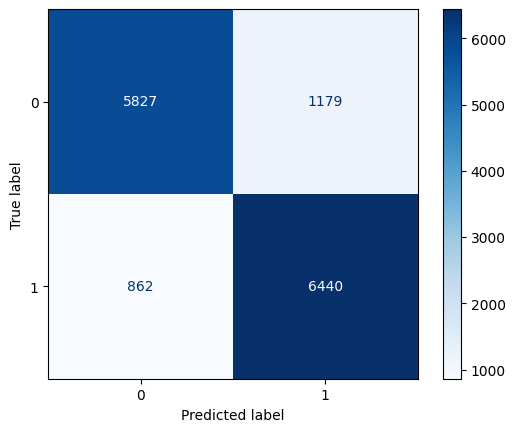

In [ ]:

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()


# **Accuracy Curve and Loss Curve**

Epoch 1: Train Acc = 0.8595, Test Acc = 0.8582, Test Loss = 0.3279
Epoch 2: Train Acc = 0.8597, Test Acc = 0.8585, Test Loss = 0.3272
Epoch 3: Train Acc = 0.8599, Test Acc = 0.8584, Test Loss = 0.3267
Epoch 4: Train Acc = 0.8599, Test Acc = 0.8586, Test Loss = 0.3264
Epoch 5: Train Acc = 0.8600, Test Acc = 0.8588, Test Loss = 0.3262
Epoch 6: Train Acc = 0.8601, Test Acc = 0.8588, Test Loss = 0.3260
Epoch 7: Train Acc = 0.8602, Test Acc = 0.8588, Test Loss = 0.3258
Epoch 8: Train Acc = 0.8602, Test Acc = 0.8588, Test Loss = 0.3257
Epoch 9: Train Acc = 0.8603, Test Acc = 0.8590, Test Loss = 0.3256
Epoch 10: Train Acc = 0.8603, Test Acc = 0.8591, Test Loss = 0.3255


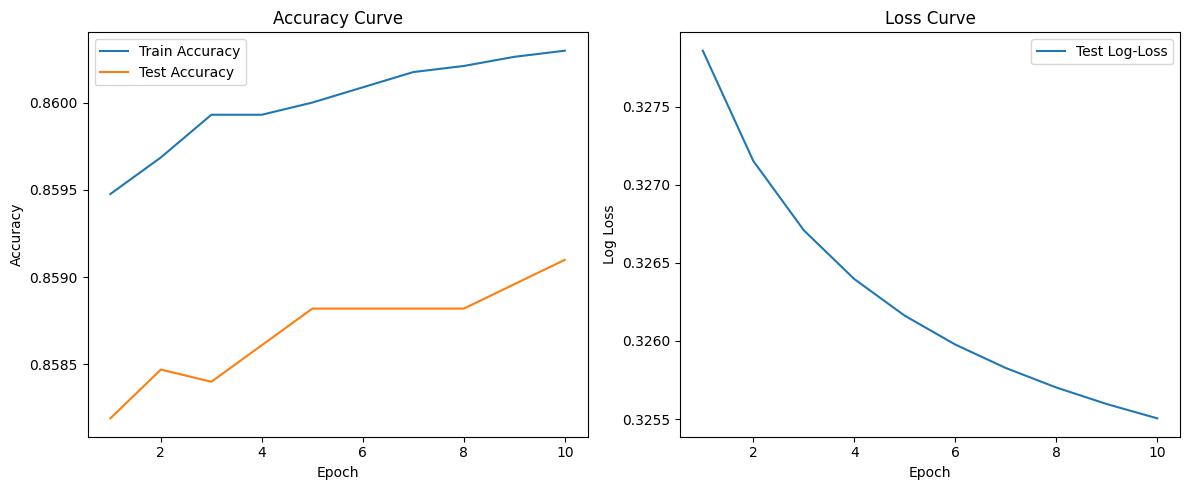

In [ ]:


epochs = 10
batch_size = 10000


train_accuracies = []
test_accuracies = []
test_losses = []


for epoch in range(epochs):

    X_shuf, y_shuf = shuffle(X_train_tfidf, y_train, random_state=epoch)


    start = 0
    while start < X_shuf.shape[0]:
        end = start + batch_size
        X_batch = X_shuf[start:end]
        y_batch = y_shuf.iloc[start:end]

        if epoch == 0 and start == 0:
            model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
        else:
            model.partial_fit(X_batch, y_batch)

        start = end


    y_train_pred = model.predict(X_train_tfidf)
    y_test_pred  = model.predict(X_test_tfidf)
    y_test_proba = model.predict_proba(X_test_tfidf)


    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)


    loss = log_loss(y_test, y_test_proba)


    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    test_losses.append(loss)

    print(f"Epoch {epoch+1}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}, Test Loss = {loss:.4f}")


epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs_range, test_losses, label='Test Log-Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Loss Curve')
plt.legend()

plt.tight_layout()
plt.show()
